# House Prediction Project

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

## 1. Import libraries

In [ ]:
!pip install sklearn
!pip install xgboost
!pip install scipy
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error,r2_score,rand_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Các điểm lưu ý:
+ train_test_split: Chia một tập dữ liệu thành hai phần: tập huấn luyện (training set) và tập kiểm tra (test set)
+ GridSearchCV: Sử dụng để tìm kiếm siêu tham số tối ưu cho một mô hình học máy. Nó thực hiện một quy trình tìm kiếm có hệ thống trên một lưới các giá trị của các siêu tham số mà bạn cung cấp, đồng thời áp dụng cross-validation (kiểm tra chéo) để đánh giá hiệu năng mô hình với mỗi bộ siêu tham số.
+ ColumnTransformer: Sử dụng để áp dụng các phép biến đổi khác nhau cho các cột cụ thể trong dữ liệu
+ Pipeline: Tự động hóa toàn bộ quá trình tiền xử lý dữ liệu và huấn luyện mô hình trong học máy
+ SimpleImputer: Thay thế các giá trị thiếu (missing values) trong dữ liệu
+ OrdinalEncoder: Chuyển đổi các dữ liệu phân loại (categorical data) thành dạng số, đặc biệt là dữ liệu có thứ tự (ordinal data)
+ StandardScaler: Chuẩn hóa (standardize) dữ liệu đầu vào trong các mô hình học máy,  làm cho dữ liệu có trung bình (mean) bằng 0 và độ lệch chuẩn (standard deviation) bằng 1, giúp cải thiện hiệu suất của nhiều mô hình học máy, đặc biệt là những mô hình phụ thuộc vào khoảng cách giữa các điểm dữ liệu
+ OneHotEncoder: Mã hóa các biến phân loại (categorical variables) thành một dạng mà các mô hình học máy có thể sử dụng hiệu quả hơn,biến các giá trị phân loại thành các cột nhị phân (0 và 1), một cột cho mỗi giá trị duy nhất trong biến phân loại.

## 2. Exploratory Data Analysis

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

In [ ]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Dataset's columns meaning:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

- MSSubClass: The building class

- MSZoning: The general zoning classification

- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access

- Alley: Type of alley access

- LotShape: General shape of property

- LandContour: Flatness of the property

- Utilities: Type of utilities available

- LotConfig: Lot configuration

- LandSlope: Slope of property

- Neighborhood: Physical locations within Ames city limits

- Condition1: Proximity to main road or railroad

- Condition2: Proximity to main road or railroad (if a second is present)

- BldgType: Type of dwelling

- HouseStyle: Style of dwelling

- OverallQual: Overall material and finish quality

- OverallCond: Overall condition rating

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date

- RoofStyle: Type of roof

- RoofMatl: Roof material

- Exterior1st: Exterior covering on house

- Exterior2nd: Exterior covering on house (if more than one material)

- MasVnrType: Masonry veneer type

- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Exterior material quality

- ExterCond: Present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Number of bedrooms above basement level

- Kitchen: Number of kitchens

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality rating

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold

- YrSold: Year Sold

- SaleType: Type of sale

- SaleCondition: Condition of sale

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train_df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
train_df.dtypes[train_df.dtypes!='object']

,0
Id,int64
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
MasVnrArea,float64
BsmtFinSF1,int64


### 2.1. Data Cleaning

+ MSSubClass vs SalePrice

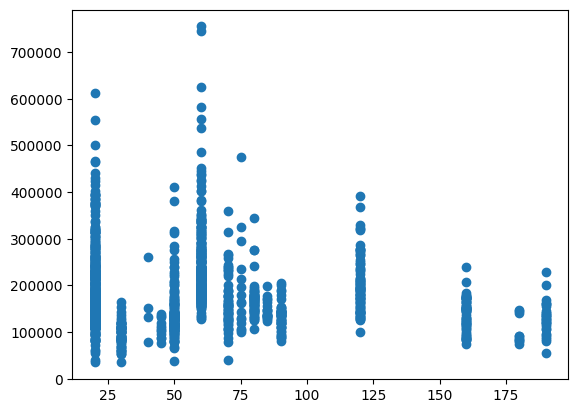

In [ ]:
plt.scatter(x='MSSubClass',y='SalePrice',data=train_df)

+ LotFrontage vs SalePrice

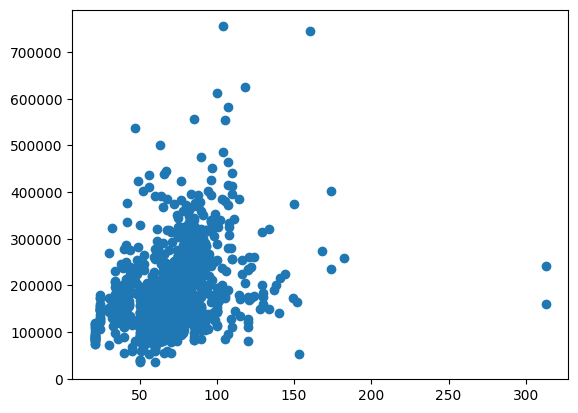

In [ ]:
plt.scatter(x='LotFrontage',y='SalePrice',data=train_df)

In [ ]:
train_df.query('LotFrontage > 300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


+ LotArea vs SalePrice

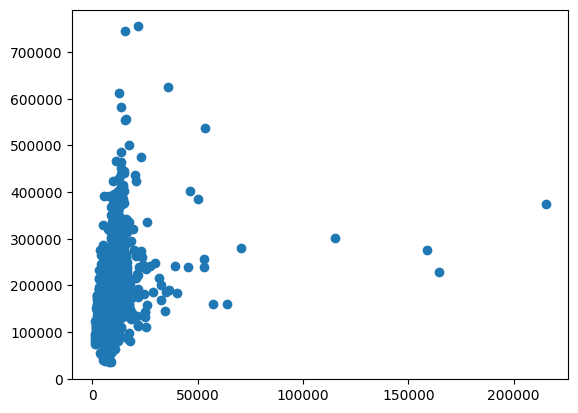

In [ ]:
plt.scatter(x='LotArea',y='SalePrice',data=train_df)

In [ ]:
train_df.query('LotArea > 55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [ ]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)

,LotArea
384,4.268474
457,4.280500
769,4.308262
1396,4.678682
1298,5.348867
451,6.037793
706,10.486449
249,14.881285
335,15.448542
313,20.518273


+ OverallQual vs SalePrice

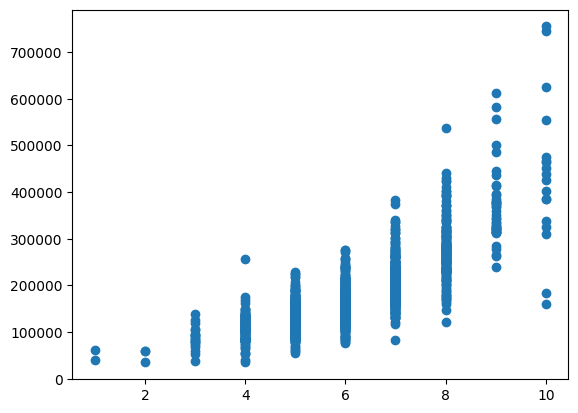

In [ ]:
plt.scatter(x='OverallQual',y='SalePrice',data=train_df)

In [ ]:
train_df.query('OverallQual == 10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


+ OverallCond vs SalePrice

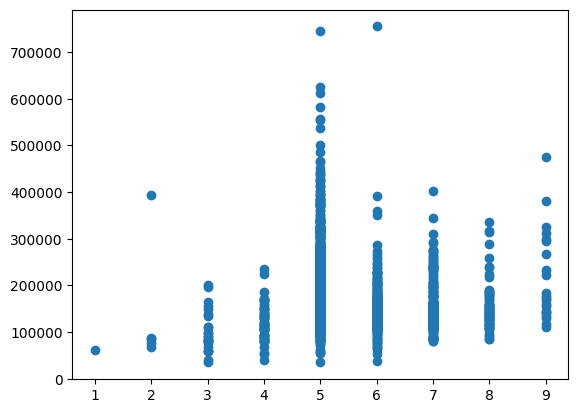

In [ ]:
plt.scatter(x='OverallCond',y='SalePrice',data=train_df)

In [ ]:
train_df.query('OverallCond == 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [ ]:
train_df.query('OverallCond == 5 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [ ]:
train_df.query('OverallCond == 6 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


+ YearBuilt vs SalePrice

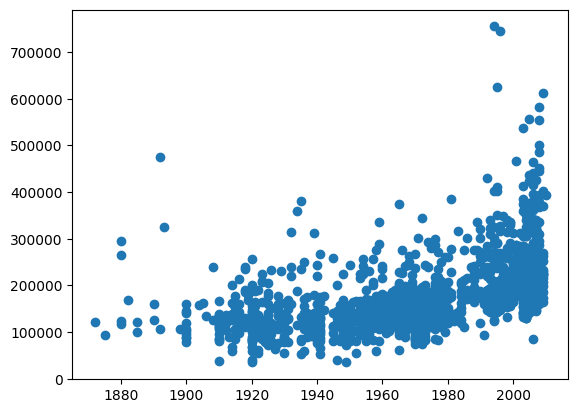

In [ ]:
plt.scatter(x='YearBuilt',y='SalePrice',data=train_df)

In [ ]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


+ YearRemodAdd vs Saleprice

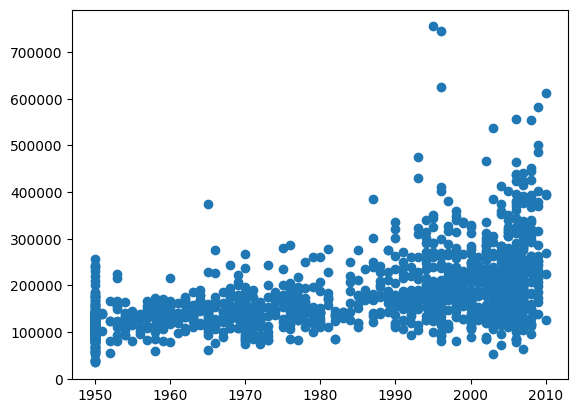

In [ ]:
plt.scatter(x='YearRemodAdd',y='SalePrice',data=train_df)

In [ ]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


+ MasVnrArea vs SalePrice

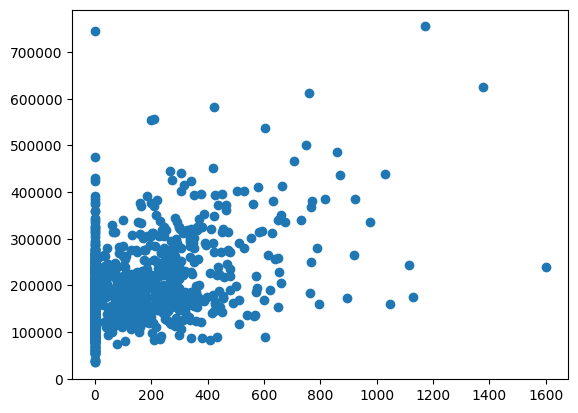

In [ ]:
plt.scatter(x='MasVnrArea',y='SalePrice',data=train_df)

In [ ]:
train_df.query('MasVnrArea > 1500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


+ BsmtFinSF1 vs SalePrice

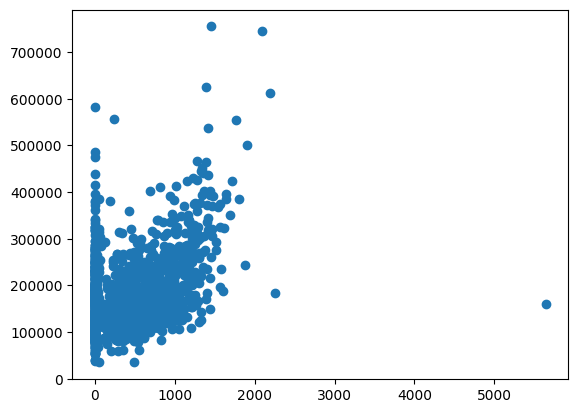

In [ ]:
plt.scatter(x='BsmtFinSF1',y='SalePrice',data=train_df)

In [ ]:
train_df.query('BsmtFinSF1 > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


+ BsmtFinSF2 vs SalePrice

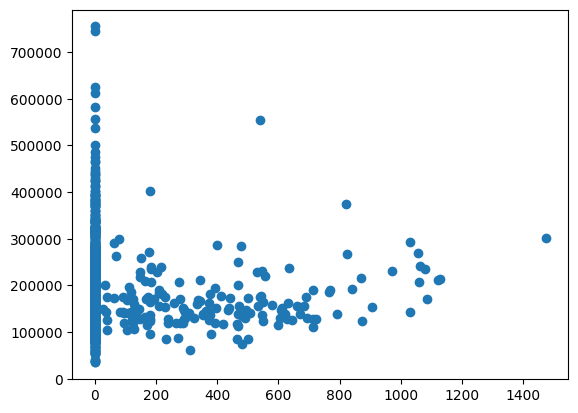

In [ ]:
plt.scatter(x='BsmtFinSF2',y='SalePrice',data=train_df)

In [ ]:
train_df.query('BsmtFinSF2 > 400 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


+ BsmtUnfSF vs SalePrice

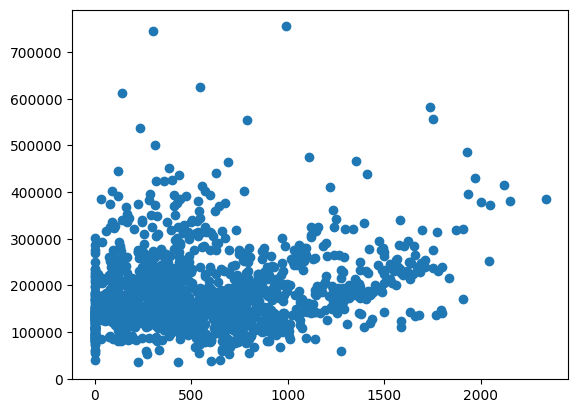

In [ ]:
plt.scatter(x='BsmtUnfSF',y='SalePrice',data=train_df)

+ TotalBsmtSF vs SalePrice

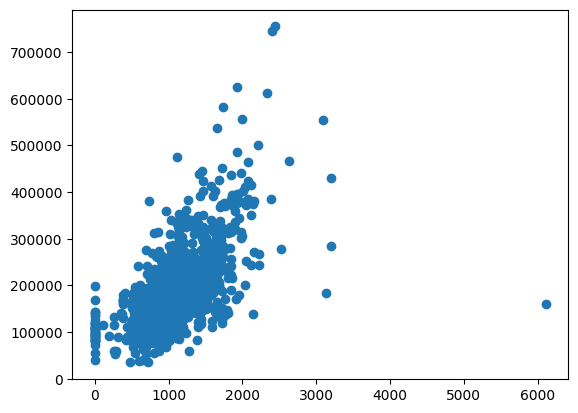

In [ ]:
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=train_df)

In [ ]:
train_df.query('TotalBsmtSF > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


+ 1stFlrSF vs SalePrice

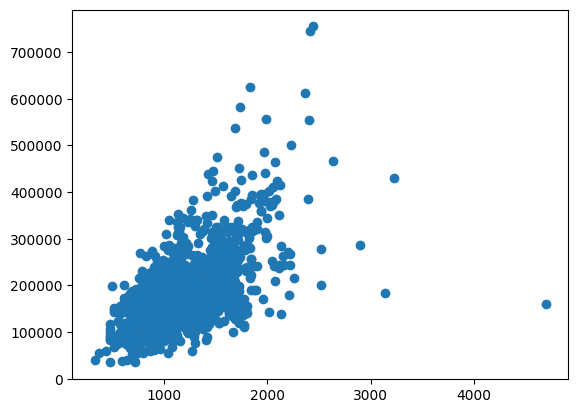

In [ ]:
plt.scatter(x='1stFlrSF',y='SalePrice',data=train_df)

+ 2ndFlrSF vs SalePrice

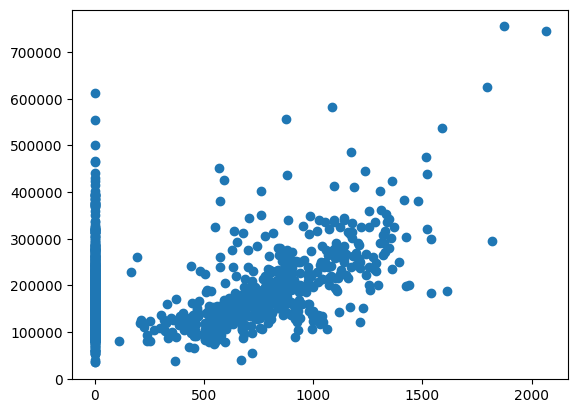

In [ ]:
plt.scatter(x='2ndFlrSF',y='SalePrice',data=train_df)

+ LowQualFinSF vs SalePrice

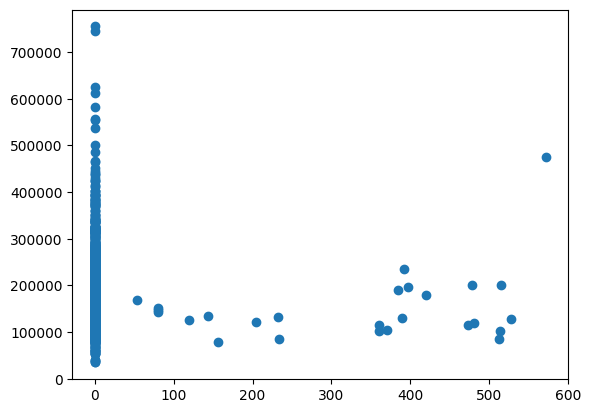

In [ ]:
plt.scatter(x='LowQualFinSF',y='SalePrice',data=train_df)

In [ ]:
train_df.query('LowQualFinSF > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


+ GrLivArea vs SalePrice

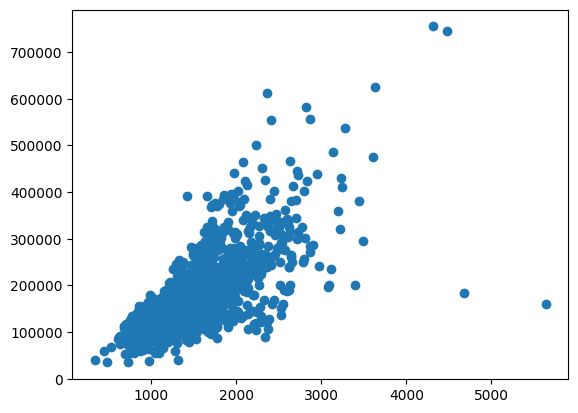

In [ ]:
plt.scatter(x='GrLivArea',y='SalePrice',data=train_df)

In [ ]:
train_df.query('GrLivArea > 4400')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


+ BsmtFullBath vs SalePrice

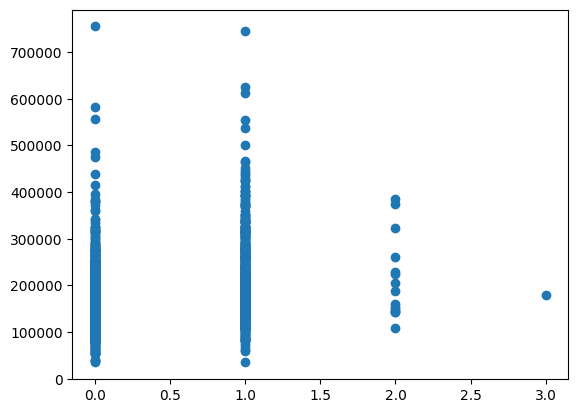

In [ ]:
plt.scatter(x='BsmtFullBath',y='SalePrice',data=train_df)

In [ ]:
train_df.query('BsmtFullBath == 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


+ BsmtHalfBath vs SalePrice

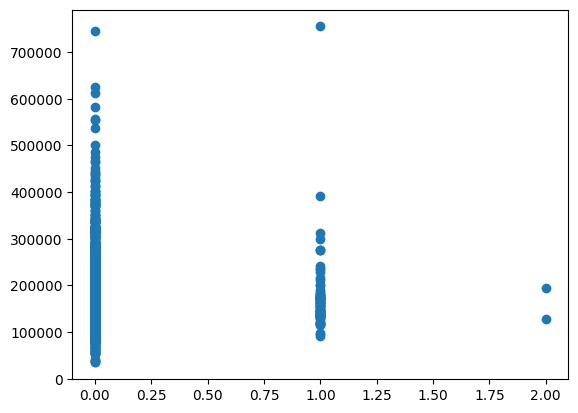

In [ ]:
plt.scatter(x='BsmtHalfBath',y='SalePrice',data=train_df)

In [ ]:
stats.zscore(train_df['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [ ]:
train_df.query('BsmtHalfBath == 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


+ FullBath vs SalePrice

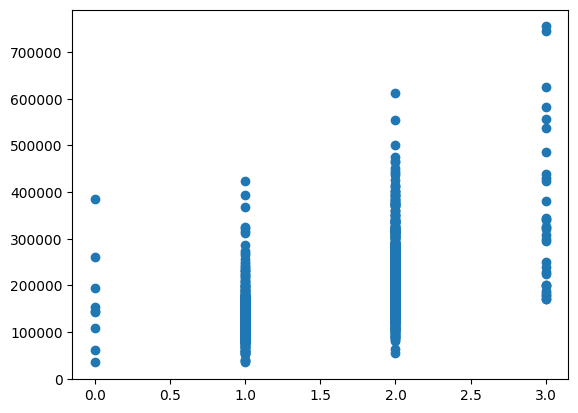

In [ ]:
plt.scatter(x='FullBath',y='SalePrice',data=train_df)

+ HalfBath vs SalePrice

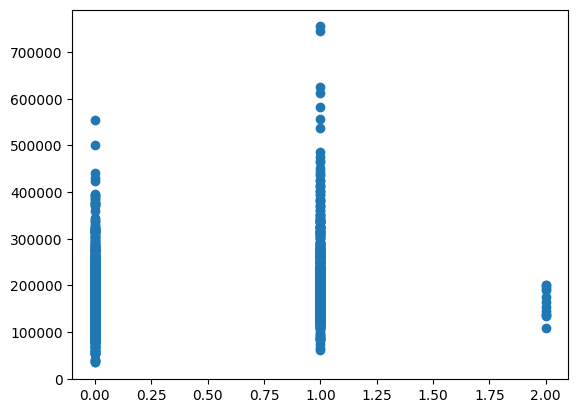

In [ ]:
plt.scatter(x='HalfBath',y='SalePrice',data=train_df)

+ BedroomAbvGr vs SalePrice

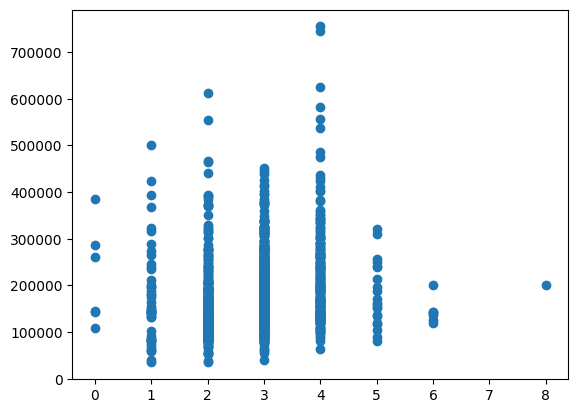

In [ ]:
plt.scatter(x='BedroomAbvGr',y='SalePrice',data=train_df)

In [ ]:
train_df.query('BedroomAbvGr == 8')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


+ KitchenAbvGr vs SalePrice

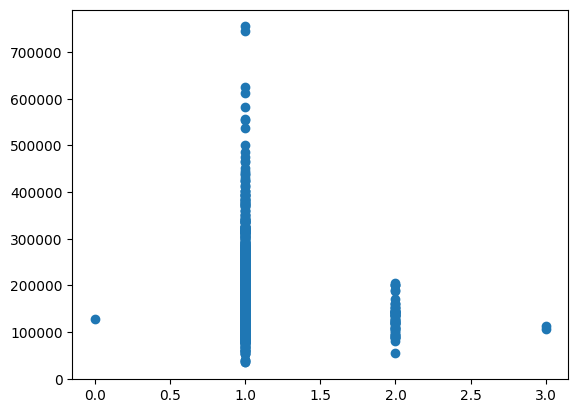

In [ ]:
plt.scatter(x='KitchenAbvGr',y='SalePrice',data=train_df)

In [ ]:
train_df.query('KitchenAbvGr == 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


+ TotRmsAbvGrd vs SalePrice

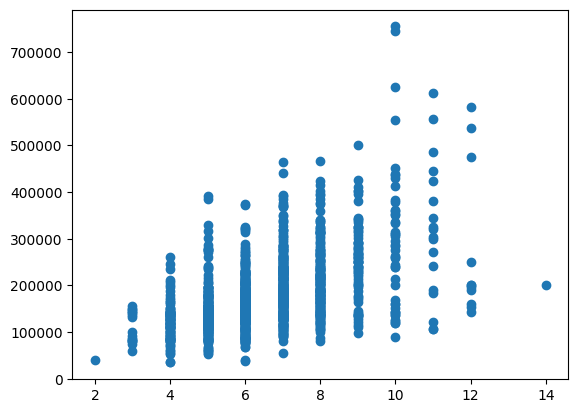

In [ ]:
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data=train_df)

In [ ]:
train_df.query('TotRmsAbvGrd == 14')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


+ Fireplaces vs SalePrice

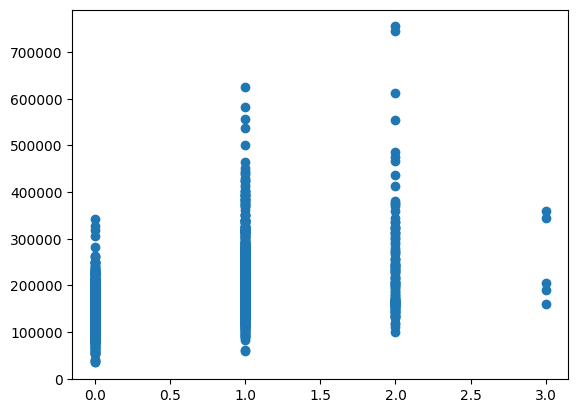

In [ ]:
plt.scatter(x='Fireplaces',y='SalePrice',data=train_df)

+ GarageYrBlt vs SalePrice

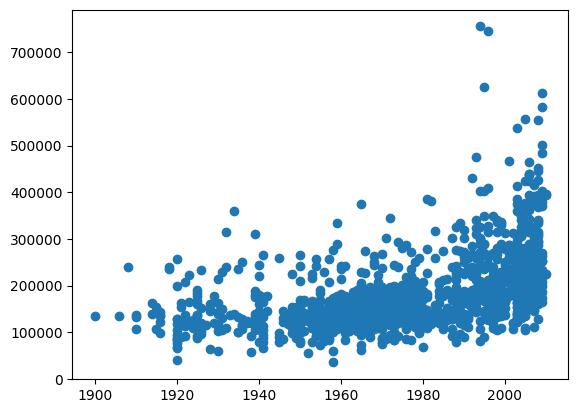

In [ ]:
plt.scatter(x='GarageYrBlt',y='SalePrice',data=train_df)

+ GarageCars vs SalePrice

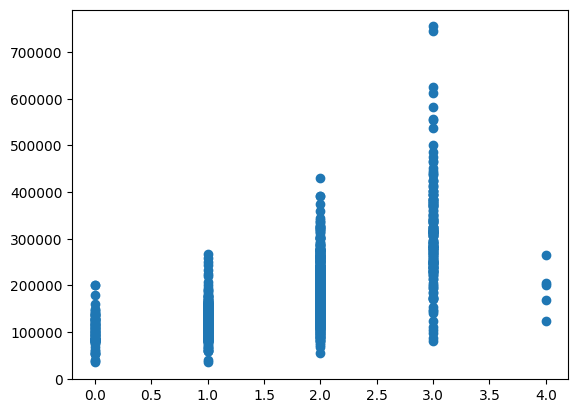

In [ ]:
plt.scatter(x='GarageCars',y='SalePrice',data=train_df)

+ GarageArea vs SalePrice

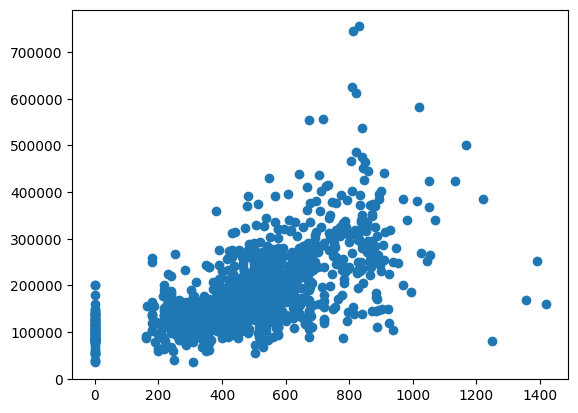

In [ ]:
plt.scatter(x='GarageArea',y='SalePrice',data=train_df)

In [ ]:
train_df.query('GarageArea>1200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


+ WoodDeckSF vs SalePrice

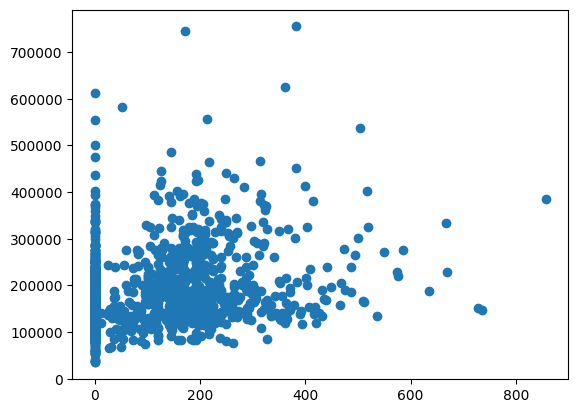

In [ ]:
plt.scatter(x='WoodDeckSF',y='SalePrice',data=train_df)

+ OpenPorchSF vs SalePrice

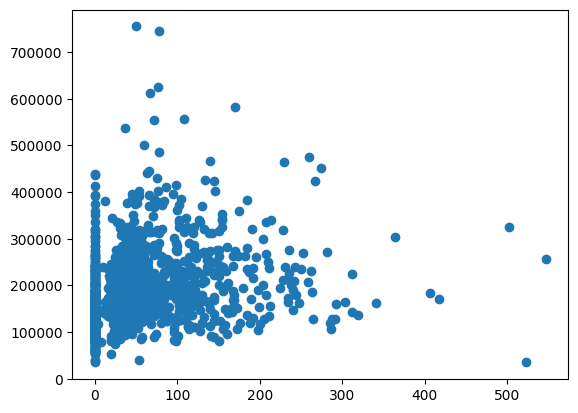

In [ ]:
plt.scatter(x='OpenPorchSF',y='SalePrice',data=train_df)

In [ ]:
train_df.query('OpenPorchSF>500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


+ EnclosedPorch vs SalePrice

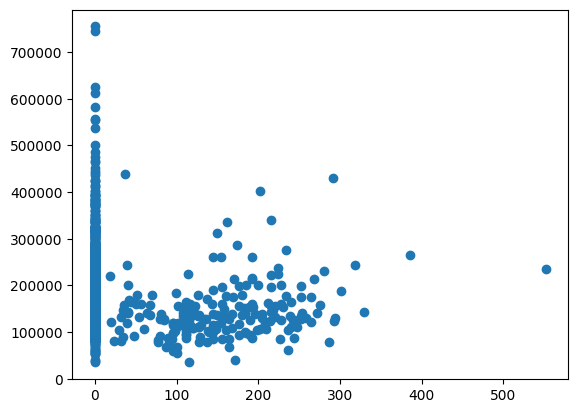

In [ ]:
plt.scatter(x='EnclosedPorch',y='SalePrice',data=train_df)

In [ ]:
train_df.query('EnclosedPorch > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


+ 3SsnPorch vs SalePrice

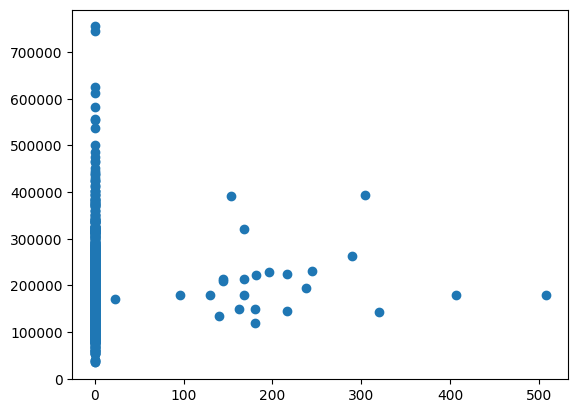

In [ ]:
plt.scatter(x='3SsnPorch',y='SalePrice',data=train_df)

+ ScreenPorch vs SalePrice

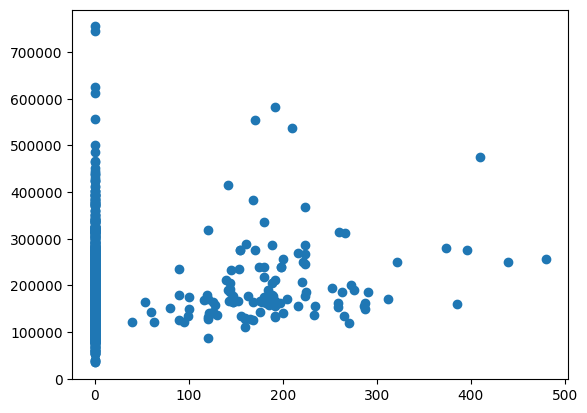

In [ ]:
plt.scatter(x='ScreenPorch',y='SalePrice',data=train_df)

+ PoolArea vs SalePrice

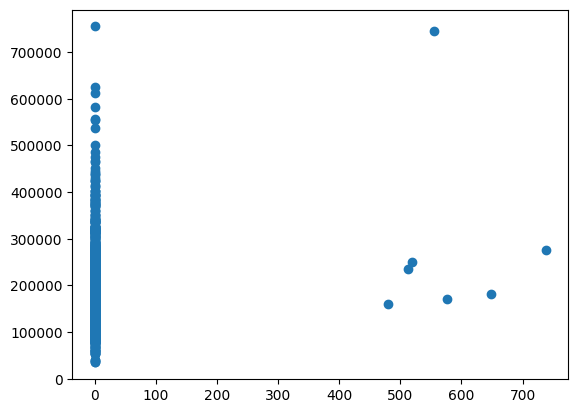

In [ ]:
plt.scatter(x='PoolArea',y='SalePrice',data=train_df)

In [ ]:
values = [935,1299,250,314,336,452,707,1397,1183,692,186,314,298,441,524,739,598,955,636,582,826,1062,1191,496,1329,198]

In [ ]:
train_df = train_df[train_df.Id.isin(values) == False]

In [ ]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1431
MiscFeature,1385
Alley,1347
Fence,1159
MasVnrType,859
FireplaceQu,685
LotFrontage,254
GarageYrBlt,77
GarageCond,77
GarageType,77


In [ ]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [ ]:
train_df['Alley'].fillna('No',inplace=True)
test_df['Alley'].fillna('No',inplace=True)

<ipython-input-72-86d2be99bb7b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No',inplace=True)
<ipython-input-72-86d2be99bb7b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

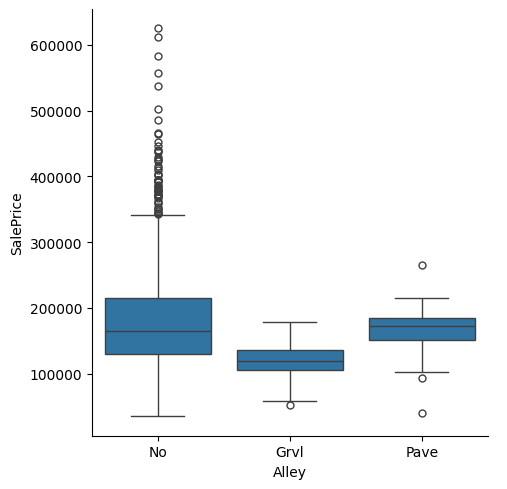

In [ ]:
sns.catplot(data=train_df,x="Alley",y="SalePrice",kind="box")

In [ ]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
train_df['Fence'].fillna('No',inplace=True)
test_df['Fence'].fillna('No',inplace=True)

<ipython-input-75-49d968ef83d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No',inplace=True)
<ipython-input-75-49d968ef83d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

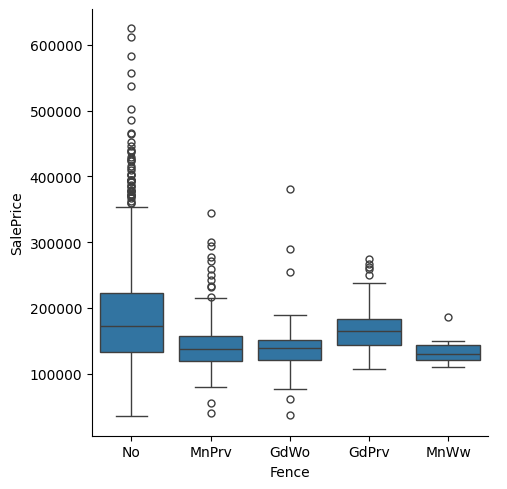

In [ ]:
sns.catplot(data=train_df,x="Fence",y="SalePrice",kind="box")

In [ ]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
train_df['MasVnrType'].fillna('No',inplace=True)
test_df['MasVnrType'].fillna('No',inplace=True)

<ipython-input-78-3cd78e37e4ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No',inplace=True)
<ipython-input-78-3cd78e37e4ec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

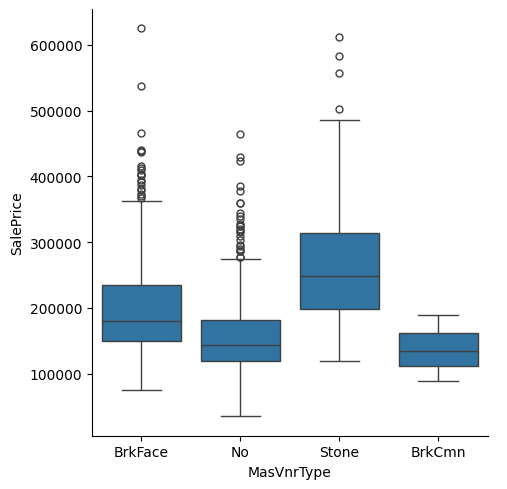

In [ ]:
sns.catplot(data=train_df,x="MasVnrType",y="SalePrice",kind="box")

In [ ]:
train_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

<ipython-input-80-1466eb676c00>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0,inplace=True)
<ipython-input-80-1466eb676c00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
train_df['FireplaceQu'].fillna('No',inplace=True)
test_df['FireplaceQu'].fillna('No',inplace=True)

<ipython-input-82-a2a8298868e9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No',inplace=True)
<ipython-input-82-a2a8298868e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

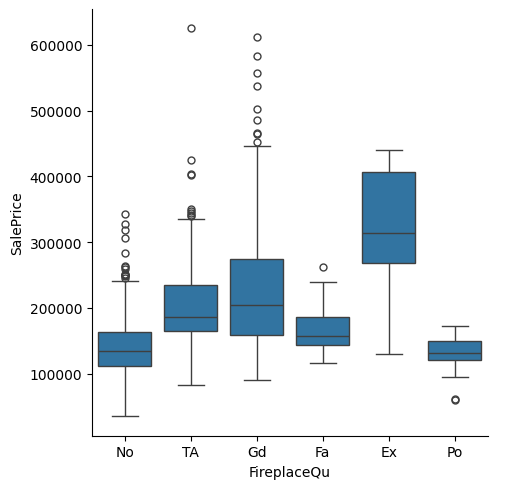

In [ ]:
sns.catplot(data=train_df,x="FireplaceQu",y="SalePrice",kind="box")

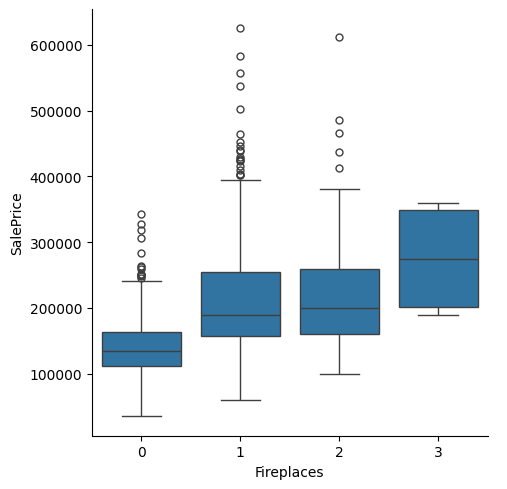

In [ ]:
sns.catplot(data=train_df,x="Fireplaces",y="SalePrice",kind="box")

In [ ]:
train_df['LotFrontage'].fillna(0,inplace=True)
test_df['LotFrontage'].fillna(0,inplace=True)

<ipython-input-85-72b46b356e9f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0,inplace=True)
<ipython-input-85-72b46b356e9f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8283085962698198

In [ ]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [ ]:
train_df['GarageCond'].fillna('No',inplace=True)
test_df['GarageCond'].fillna('No',inplace=True)

<ipython-input-88-7cf1b6dce9e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No',inplace=True)
<ipython-input-88-7cf1b6dce9e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

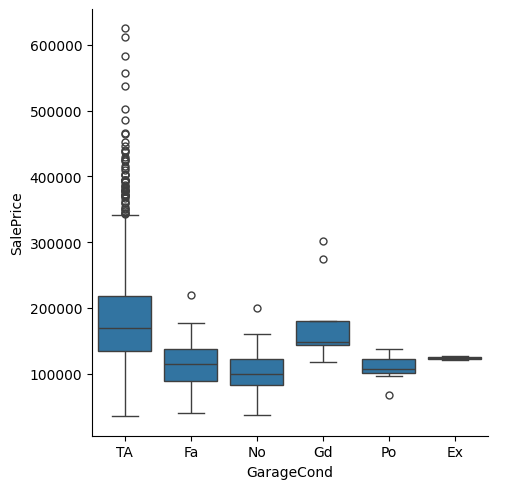

In [ ]:
sns.catplot(data=train_df,x="GarageCond",y="SalePrice",kind="box")

In [ ]:
train_df['GarageType'].fillna('No',inplace=True)
test_df['GarageType'].fillna('No',inplace=True)

<ipython-input-90-703d76a1c253>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No',inplace=True)
<ipython-input-90-703d76a1c253>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

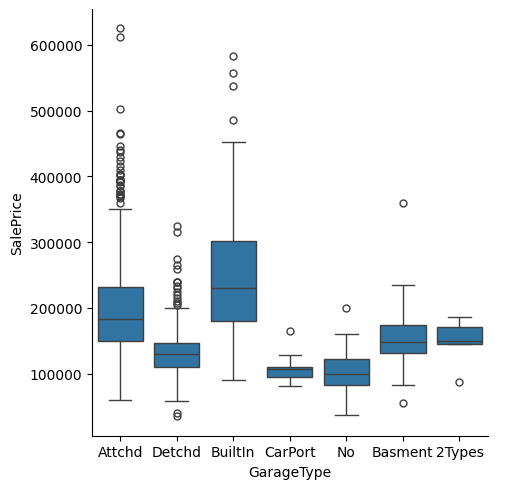

In [ ]:
sns.catplot(data=train_df,x="GarageType",y="SalePrice",kind="box")

In [ ]:
train_df['GarageFinish'].fillna('No',inplace=True)
test_df['GarageFinish'].fillna('No',inplace=True)

<ipython-input-92-b9715144379b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No',inplace=True)
<ipython-input-92-b9715144379b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

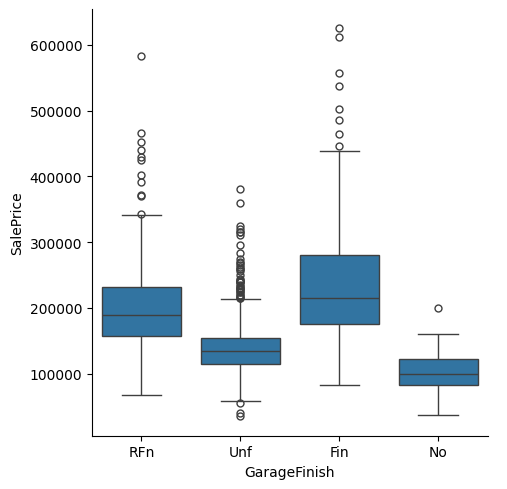

In [ ]:
sns.catplot(data=train_df,x="GarageFinish",y="SalePrice",kind="box")

In [ ]:
train_df['GarageQual'].fillna('No',inplace=True)
test_df['GarageQual'].fillna('No',inplace=True)

<ipython-input-94-a0ad61a5f959>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No',inplace=True)
<ipython-input-94-a0ad61a5f959>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

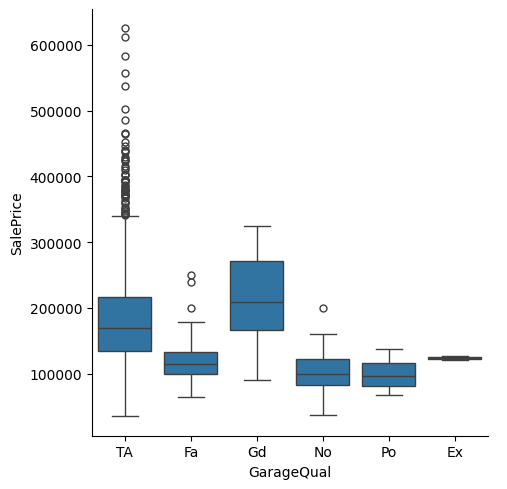

In [ ]:
sns.catplot(data=train_df,x="GarageQual",y="SalePrice",kind="box")

In [ ]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
train_df['BsmtFinType2'].fillna('Unf',inplace=True)
test_df['BsmtFinType2'].fillna('Unf',inplace=True)

<ipython-input-97-882721ad2e5d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf',inplace=True)
<ipython-input-97-882721ad2e5d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

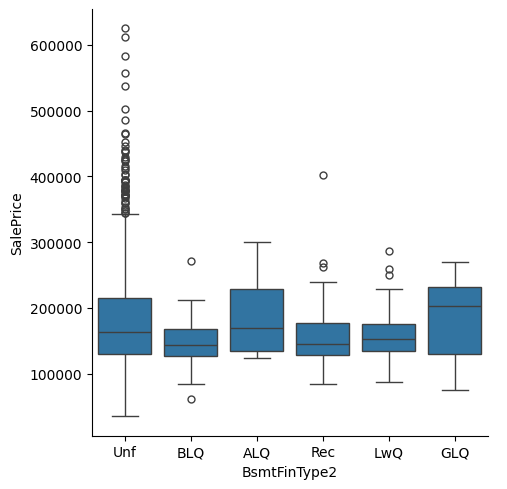

In [ ]:
sns.catplot(data=train_df,x="BsmtFinType2",y="SalePrice",kind="box")

In [ ]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [ ]:
train_df['BsmtExposure'].fillna('No',inplace=True)
test_df['BsmtExposure'].fillna('No',inplace=True)

<ipython-input-100-abf1c4d60d75>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No',inplace=True)
<ipython-input-100-abf1c4d60d75>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

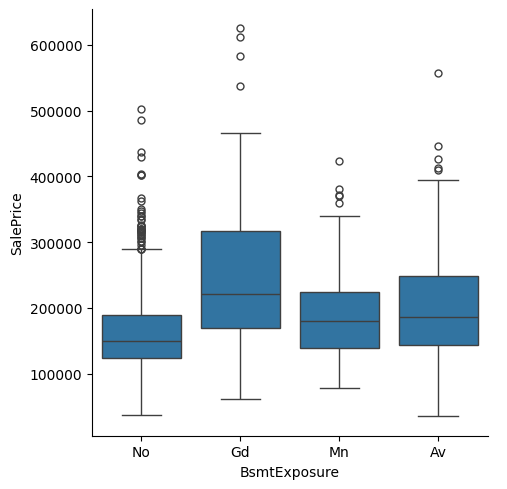

In [ ]:
sns.catplot(data=train_df,x="BsmtExposure",y="SalePrice",kind="box")

In [ ]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
train_df['BsmtQual'].fillna('No',inplace=True)
test_df['BsmtQual'].fillna('No',inplace=True)

<ipython-input-103-c6955fc112c7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No',inplace=True)
<ipython-input-103-c6955fc112c7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

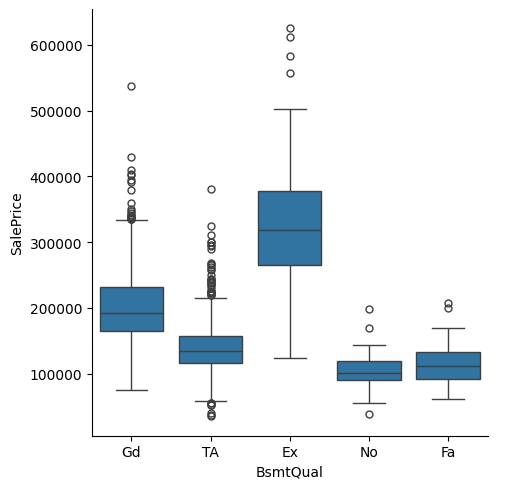

In [ ]:
sns.catplot(data=train_df,x="BsmtQual",y="SalePrice",kind="box")

In [ ]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [ ]:
train_df['BsmtCond'].fillna('No',inplace=True)
test_df['BsmtCond'].fillna('No',inplace=True)

<ipython-input-106-129b629bfaaa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No',inplace=True)
<ipython-input-106-129b629bfaaa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

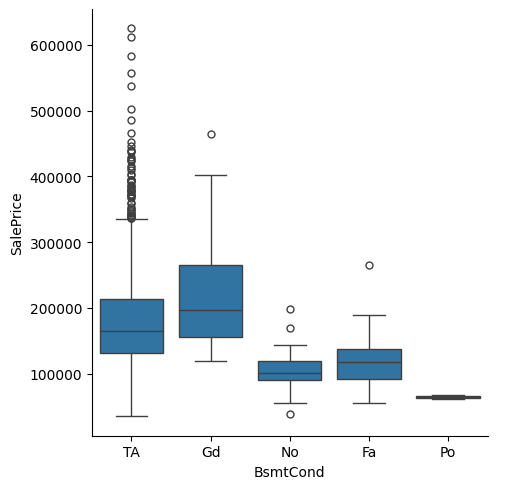

In [ ]:
sns.catplot(data=train_df,x="BsmtCond",y="SalePrice",kind="box")

In [ ]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [ ]:
train_df['BsmtFinType1'].fillna('Unf',inplace=True)
test_df['BsmtFinType1'].fillna('Unf',inplace=True)

<ipython-input-109-9b79a569c8cd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf',inplace=True)
<ipython-input-109-9b79a569c8cd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

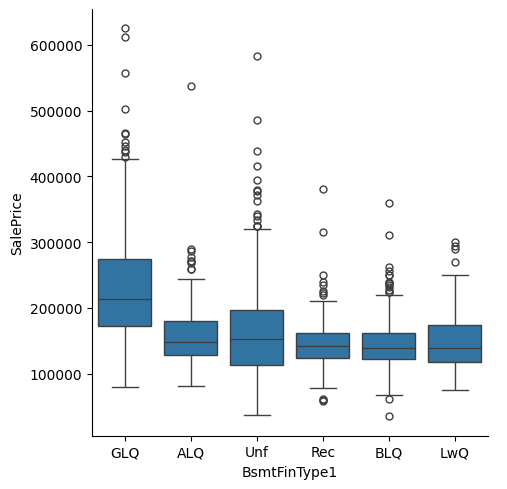

In [ ]:
sns.catplot(data=train_df,x="BsmtFinType1",y="SalePrice",kind="box")

In [ ]:
train_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

<ipython-input-111-1466eb676c00>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0,inplace=True)
<ipython-input-111-1466eb676c00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
train_df['Electrical'].fillna('SBrkr',inplace=True)
test_df['Electrical'].fillna('SBrkr',inplace=True)

<ipython-input-112-c76f0ecb1467>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr',inplace=True)
<ipython-input-112-c76f0ecb1467>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

### 2.2. Remodel the dataset

In [ ]:
train_df = train_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])

In [ ]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [ ]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [ ]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [ ]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [ ]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [ ]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [ ]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

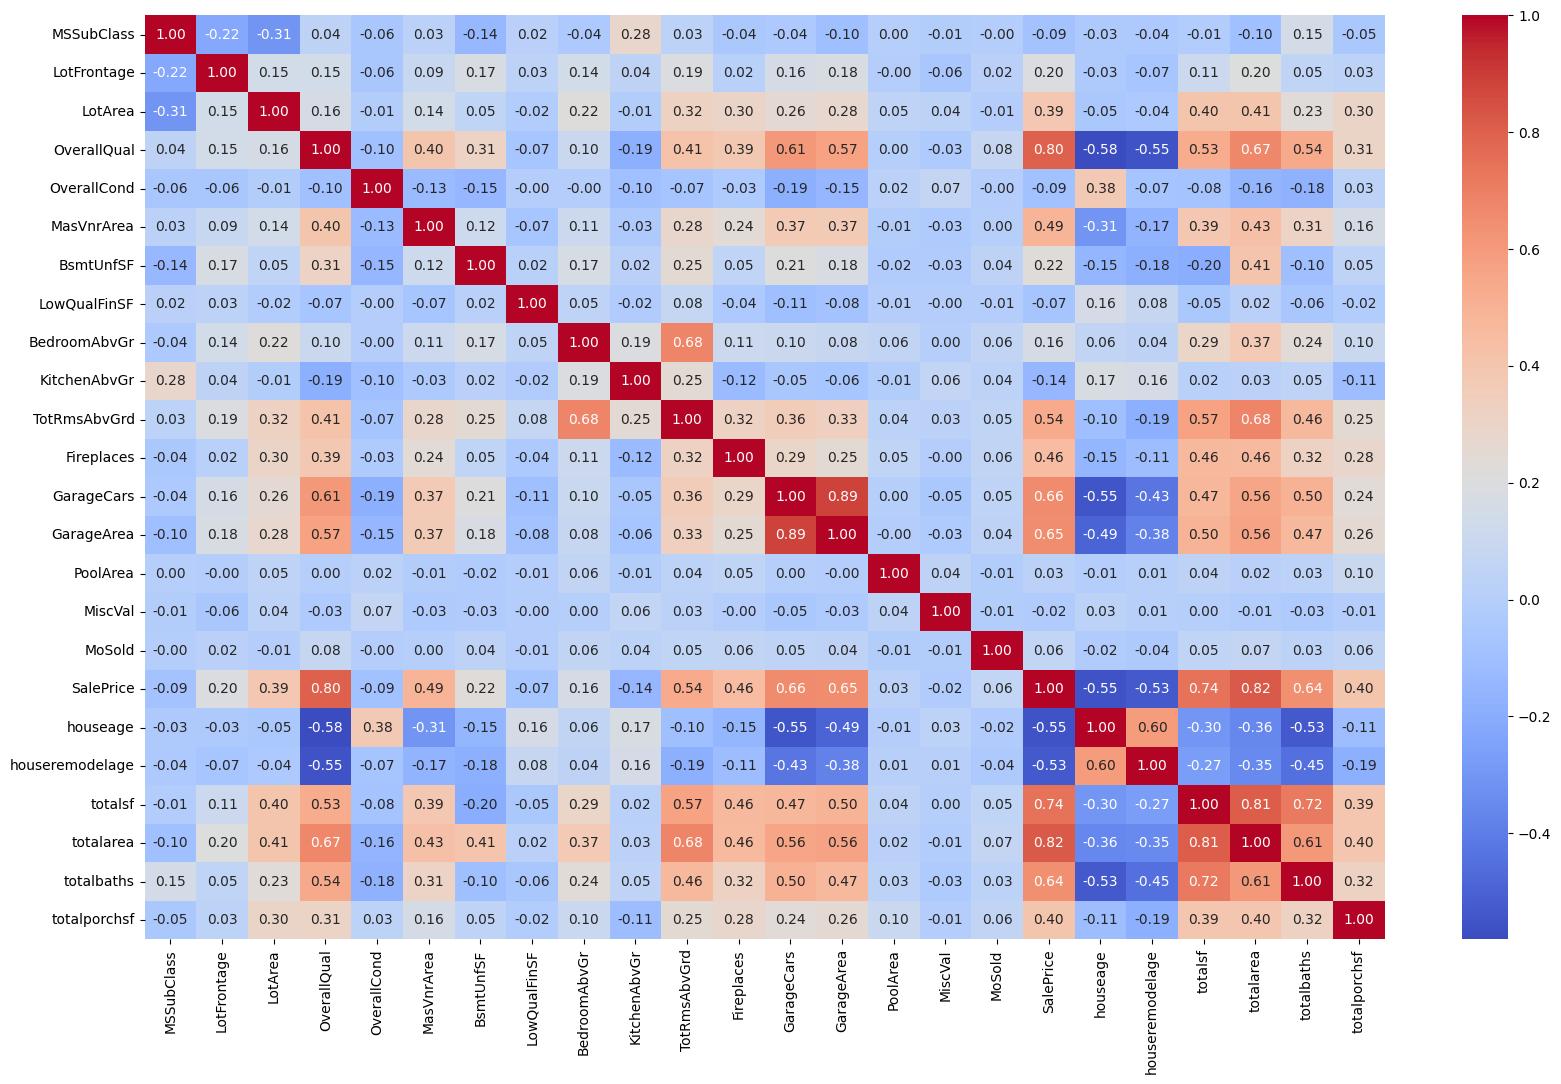

In [ ]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")

In [ ]:
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

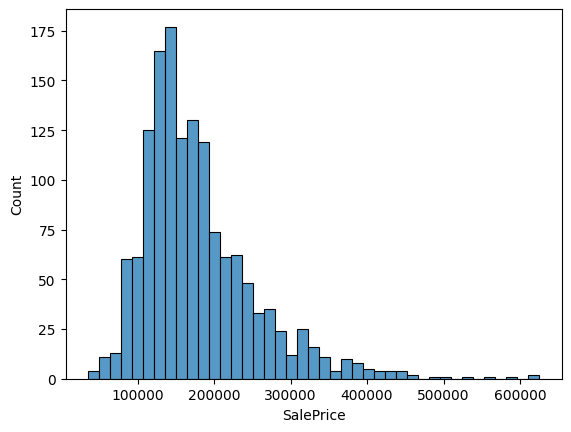

In [ ]:
sns.histplot(train_df,x=train_df['SalePrice'])

In [ ]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

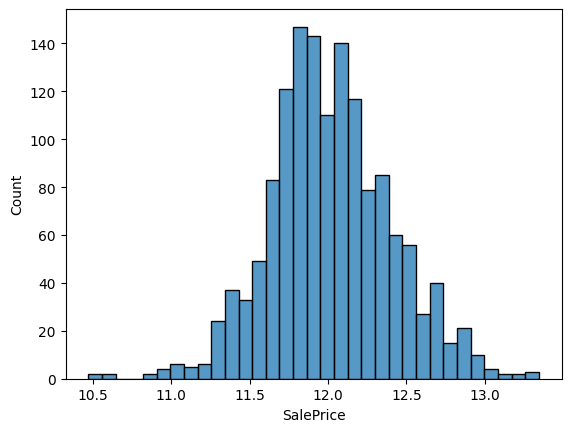

In [ ]:
sns.histplot(train_df,x=train_df['SalePrice'])

In [ ]:
train_df.dtypes[train_df.dtypes=='object']

,0
MSZoning,object
Street,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object
Condition1,object
Condition2,object


In [ ]:
train_df.dtypes[train_df.dtypes!='object']

,0
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
MasVnrArea,float64
BsmtUnfSF,int64
LowQualFinSF,int64
BedroomAbvGr,int64
KitchenAbvGr,int64


In [ ]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [ ]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation', 'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [ ]:
num_cols = train_df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('SalePrice')

In [ ]:
num_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),   # Khi gặp giá trị thiếu(NaN),thay thế chúng bằng giá trị trung bình (mean) của cột tương ứng.
    ('scaler',StandardScaler())                  # Chuẩn hóa dữ liệu để đảm bảo mỗi cột có trung bình bằng 0 và độ lệch chuẩn bằng 1.
])

In [ ]:
ode_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),        # Thay thế các giá trị bị thiếu (NaN) trong dữ liệu phân loại bằng giá trị xuất hiện nhiều nhất trong cột.
    ('ode',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))    # Mã hóa các giá trị phân loại thành số nguyên (integers): Các giá trị đã biết sẽ được ánh xạ thành số nguyên,các giá trị không xác định sẽ được mã hóa thành -1.
])

In [ ]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),    # Thay thế giá trị bị thiếu (NaN) bằng giá trị xuất hiện nhiều nhất trong mỗi cột dữ liệu phân loại.
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))     # Mã hóa One-Hot Encoding: Biến mỗi giá trị phân loại thành một hoặc nhiều cột nhị phân.
])

In [ ]:
col_trans = ColumnTransformer(transformers=[
    ('num_p',num_pipeline,num_cols),    # Áp dụng num_pipeline (Pipeline cho dữ liệu số) lên các cột trong danh sách num_cols.
    ('ode_p',ode_pipeline,ode_cols),    # Áp dụng ode_pipeline (Pipeline cho dữ liệu phân loại dạng thứ tự) lên các cột trong danh sách ode_cols.
    ('ohe_p',ohe_pipeline,ohe_cols)],   # Áp dụng ohe_pipeline (Pipeline cho dữ liệu phân loại không thứ tự) lên các cột trong danh sách ohe_cols.
    remainder='passthrough',        # Giữ nguyên (không biến đổi) các cột không được chỉ định trong transformers.
    n_jobs=-1)                  # Cho phép thực thi song song để tăng tốc độ xử lý, bằng cách sử dụng tất cả các CPU có sẵn.

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing',col_trans)
])

In [ ]:
X = train_df.drop('SalePrice',axis=1)
y = train_df['SalePrice']

In [ ]:
X_preprocessed = pipeline.fit_transform(X)       # Áp dụng các bước xử lý đã học được để biến đổi dữ liệu X,tạo ra X_preprocessed - phiên bản dữ liệu đã được tiền xử lý đầy đủ.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_preprocessed,y,test_size=0.2,random_state=25)

# 3. Train the model

## 3.1. Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_lr)

0.014453805846922213

In [ ]:
r2_score(y_test,y_pred_lr)

0.9086771497950734

## 3.2. Random Forest

In [ ]:
RFR = RandomForestRegressor(random_state=13)

In [ ]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [ ]:
rfr_cv = GridSearchCV(RFR,param_grid_RFR,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
rfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
np.sqrt(-1*rfr_cv.best_score_)

0.13526612665975488

In [ ]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}

In [ ]:
y_pred_rfr = rfr_cv.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_rfr)

0.01739177992407686

In [ ]:
r2_score(y_test,y_pred_rfr)

0.8901142765009725

## 3.3. Decision Tree


In [ ]:
DCT = DecisionTreeRegressor(random_state=13)

In [ ]:
param_grid_DCT = {
    'max_depth' : [5,10,15],
    'min_samples_split' : [10,20,30],
    'min_samples_leaf' : [5,10,15]
}

In [ ]:
DCT_cv = GridSearchCV(DCT,param_grid_DCT,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
DCT_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
np.sqrt(-1*DCT_cv.best_score_)

0.17355542354238776

In [ ]:
DCT_cv.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 30}

In [ ]:
y_pred_DCT = DCT_cv.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_DCT)

0.024664017558523273

In [ ]:
r2_score(y_test,y_pred_DCT)

0.8441664150741084

## 3.4. XGB Regressor

In [ ]:
XGB = XGBRegressor(random_state=13)

In [ ]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [ ]:
xgb_cv = GridSearchCV(XGB,param_grid_XGB,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11468148796720476

In [ ]:
y_pred_xgb = xgb_cv.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_xgb)

0.01406853332127742

In [ ]:
r2_score(y_test,y_pred_xgb)

0.9111114003668718

## 3.5. Ridge Regression

In [ ]:
ridge = Ridge()

In [ ]:
param_grid_ridge = {
    'alpha': [0.05,0.1,1,3,5,10]
}

In [ ]:
ridge_cv = GridSearchCV(ridge,param_grid_ridge,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
np.sqrt(-1 * ridge_cv.best_score_)

0.11434827140087273

In [ ]:
y_pred_ridge = ridge_cv.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_ridge)

0.013150284313007458

In [ ]:
r2_score(y_test,y_pred_ridge)

0.9169131329708085

## 3.6. K Nearest Neighbors

In [ ]:
errors = []

for k in range(1,100):
    knn_temp = KNeighborsRegressor(n_neighbors=k)
    knn_temp.fit(X_train,y_train)
    y_temp_pred = knn_temp.predict(X_test)
    errors.append(mean_squared_error(y_test,y_temp_pred))


best_k = np.argmin(errors) + 1
print(f"Best k: {best_k}, Mean Squared Error: {errors[best_k-1]}")

Best k: 7, Mean Squared Error: 0.029772574107728243


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
y_pred_knn = knn_regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_knn)

0.029772574107728243

In [ ]:
r2_score(y_test,y_pred_knn)

0.8118892453481995

## 3.7. Compare

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

results = {}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Mean Squared Error': mean_squared_error(y_test,y_pred),
        'R^2 Score': r2_score(y_test,y_pred)
    }

for name, metrics in results.items():
    print(f"Results for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Results for LinearRegression:
Mean Squared Error: 7765345714877494.0000
R^2 Score: -49063444674693280.0000
Results for Ridge:
Mean Squared Error: 0.0137
R^2 Score: 0.9135
Results for DecisionTreeRegressor:
Mean Squared Error: 0.0354
R^2 Score: 0.7762
Results for RandomForestRegressor:
Mean Squared Error: 0.0170
R^2 Score: 0.8925
Results for XGBRegressor:
Mean Squared Error: 0.0179
R^2 Score: 0.8869
Results for KNeighborsRegressor:
Mean Squared Error: 0.0322
R^2 Score: 0.7965


In [ ]:
pd.DataFrame.from_dict(results,orient='index')

,Mean Squared Error,R^2 Score
LinearRegression,7.765346e+15,-4.906344e+16
Ridge,1.369346e-02,9.134812e-01
DecisionTreeRegressor,3.542569e-02,7.761714e-01
RandomForestRegressor,1.701596e-02,8.924888e-01
XGBRegressor,1.790222e-02,8.868892e-01
KNeighborsRegressor,3.220446e-02,7.965240e-01


# 4. Ending

In [ ]:
df_test_preprocess = pipeline.transform(test_df)

In [ ]:
y_stacking = np.exp(ridge_cv.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv',index=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_22848\594311447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking


<h1> Thanks for watching this notebook! <h1>

## Author

<a href="https://www.linkedin.com/in/hi%E1%BA%BFu-nguy%E1%BB%85n-4444b5241">Hiếu Nguyễn</a>